<p style="text-align:center">
    <a href="https://www.ict.mahidol.ac.th/en/" target="_blank">
    <img src="https://www3.ict.mahidol.ac.th/ICTSurveysV2/Content/image/MUICT2.png" width="400" alt="Faculty of ICT">
    </a>
</p>

# Lab07: ML Basics: Regression

This Lab Assignment is an exercise in Regression modelling using a more sophisticated model to predict and understand house prices in the Melbourne dataset (2017). The assignment will guide you to train a more advanced model on the pricing dataset, report and compare its error scores, and view its learning curves. Furthermore, the assignment will take you through steps to export the model and make predictions within a web dashboard.

__Learning Objectives are:__
* Recognize Overfitting & Underfitting.
* Compare Models with Error Metrics (MAE, R2)
* Deliver Predictions in a Dashboard
* Inform users that model predictions come with errors: **f(x) = y_pred + error + noise**


__Instructions:__
1. Append your ID at the end of this jupyter file name. For example, ```ITCS227_Lab07_Assignment_6788123.ipynb```
2. Complete each task in the lab.
3. Once finished, raise your hand to call a TA.
4. The TA will check your work and give you an appropriate score.
5. Submit your IPYNB source code to MyCourse as record-keeping.

## 0. Install Packages:
- Uncomment this line to install the `Streamlit` dashboard library, we will use later.

*If your machine reports other missing libraries, then you may need to install the library using pip. (Mostly the libraries used are already installed with Anaconda).*

In [62]:

%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


# Explaining Melbourne Housing Market - 

### Dataset Source: 

Melbourne real estate is BOOMING. Can you find the insight or predict the next big trend to become a real estate mogul… or even harder, to snap up a reasonably priced 2-bedroom unit?

**Content**
- This is a snapshot of a dataset created by Tony Pino.
- It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

**Notes on Specific Variables**
- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

**Acknowledgements**
- This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

In [63]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

def plotly_map(df, latlng_cols=('lat','lng'), z=None, custom_data_cols=[], custom_text=[], center_dict=dict(lat=13.6, lon=100.4), zoom=5, WRITE=False, WRITE_FN=None):
    """ 
    @WRITE_FN - do not include extension - i.e. `.png` or `.html`, as both files will be written.
    Docs:   https://plotly.com/python-api-reference/generated/plotly.express.density_mapbox.html
            https://plotly.com/python/mapbox-density-heatmaps/
    """
    pio.templates.default = 'plotly_white' # 'plotly_dark'
    fig = px.density_mapbox(df, 
                            lat=latlng_cols[0], 
                            lon=latlng_cols[1], 
                            z=z,
                            radius=5,
                            center=center_dict, zoom=zoom,
                            mapbox_style=["open-street-map",'carto-darkmatter'][0],
                            custom_data=custom_data_cols,
                           )

    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    if custom_text:
        fig.update_traces(
            hovertemplate="<br>".join(custom_text)
        )
    fig.show(config={'displayModeBar': False} )
    if WRITE:
        if WRITE_FN != None and isinstance(WRITE_FN, str) and len(WRITE_FN)>4:
            ofn = f'{WRITE_FN}_MapPlot_{TIMESTAMP_FILENAME()}'
            fig.write_image(ofn+'.png')
            fig.write_html(ofn+'.html', full_html=False, include_plotlyjs=False, include_mathjax=False )

### Exploration Code:

In [64]:
df = pd.read_csv('files/melb_data.csv').drop('Unnamed: 0',axis=1)
print('Total Num of Records ',len(df))
print(df.dtypes)
df.head()

Total Num of Records  18396
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [65]:
dfm = df.dropna()
plotly_map(dfm[dfm['Method']=='S'], 
           latlng_cols=('Lattitude','Longtitude'), 
           z='Price',
           custom_data_cols=['CouncilArea',
                             'Distance',
                             'Landsize',
                             'BuildingArea',
                             'Rooms',
                             'Bathroom',
                             'Price'
                           ], 
           custom_text=['Area: %{customdata[0]}',
                        'Distance: %{customdata[1]}',
                        'LS / BA: %{customdata[2]}/%{customdata[3]}',
                        'Rm / Br: %{customdata[4]}/%{customdata[5]}',
                        'Price AUD-$: %{customdata[6]:.,1f}'
                            ],
           center_dict=dict(lat=-37.814, lon=144.963),
           zoom=9
          )

## X -> Y Dataset & Train / Test Split:

In [66]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

cols_to_use = ['Distance', 'Landsize', 'BuildingArea', 'Rooms', 'Bathroom']

def get_some_data(data, cols_to_use):
    y = data.Price
    X = data[cols_to_use]
    imp = IterativeImputer(max_iter=10, random_state=0)
    imputed_X = imp.fit(X).transform(X) # This uses MICE - Multivariate Imputation from Chained Equations.
    return imputed_X, y
    

X, y = get_some_data( df, cols_to_use )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0) # Split into 85% training and 15% testing data

## Fit the Prediction Model for House Prices:

* This time we will use the `GradientBoostingRegressor` which is an excellent model [Friedman 2001], in particular for tabular data, for regression (and for classification using `HistGradientBoostingClassifier`).
> * This model builds an "[ensemble](https://scikit-learn.org/stable/modules/ensemble.html)" of `100` "decision trees" (a flowchart) and iteratively improving its decisions (accuracy) to reduce its errors.
> * The collection of all trees gives the most balanced, least error result, which is a weighted combination of all trees.
> * Like all Ensembles, GBR is designed to manage error improvements on both train and test sets.
> 
> **Reference:**  [Friedman2001] Friedman, J.H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29, 1189-1232.

* There are more recent and more advanced models. This one is simple to use and gives good results. It will automatically encode categorical items (similar to one-hot encoding), and handles numeric value as we will see.

Let's go ahead and fit the new model on the `training set`:

In [67]:
my_model = GradientBoostingRegressor()
my_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Q1: Measure the error of this new model:
1. Get the Predicts on the `test set`:
2. Measure and show their MAE score for this model.
3. Measure and show their R2 scores for this model.

In [68]:
from sklearn.metrics import mean_absolute_error, r2_score
# insert your code here
y_pred = my_model.predict(X_test)
print(f"MAE:{mean_absolute_error(y_test, y_pred):,.2f}")
print(f"R2:{r2_score(y_test,y_pred):,.2f}")

MAE:289,541.24
R2:0.56


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```Python
y_pred = my_model.predict(X_test)
print(f"Test: mean_absolute_error: {mean_absolute_error(y_test, y_pred):,.2f}")
print(f"Test: r2_score: {r2_score(y_test, y_pred):,.2f}")
```

</details>

## Q2: Measure the error of this model:
1. Get the Predicts on the `train set`:
2. Measure and show their MAE score for this model.
3. Measure and show their R2 scores for this model.

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score
# insert your code here
y_pred = my_model.predict(X_train)
print(f"MAE:{mean_absolute_error(y_train, y_pred):,.2f}")
print(f"R2:{r2_score(y_train,y_pred):,.2f}")

MAE:270,652.43
R2:0.60


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```Python
print('Similar to above, but you will use `X_train` and `y_train`.')
print('This is because we will use on the `training set`, instead of the `test set`.')
```

</details>

## Q3: Show the learning curve plots of this model:
1. Using the function provided,  create the `learning curve` Plots for your new model.

*NB: As the new model is more complex, it can take longer than the LinearRegression we used earlier.*

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve # New - for evaluating errors and then visualizing later.

def _plot_learning_curve(estimator, train_sizes, train_scores, valid_scores, metric='MAE', plt_text='', ax=None):
    train_errors = -train_scores.mean(axis=1)
    valid_errors = -valid_scores.mean(axis=1)
    ax = plt.gca() if not ax else ax
    ax.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
    ax.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
    ax.set_xlabel("Training set size")
    ax.set_ylabel(f'{metric}')
    # plt.gca().set_xscale("log", nonpositive='clip')
    ax.grid()
    ax.legend(loc="upper right")
    ax.set_ylim(bottom=0, top=1.25*max([max(train_errors), max(valid_errors)]))
    ax.set_title(f'{estimator.__class__.__name__}\n{plt_text}', fontsize=8)

def _make_learning_curve( estimator, X_train, y_train ):
    train_sizes, train_scores, valid_scores = learning_curve( estimator, 
                        X_train, y_train, 
                        train_sizes=np.linspace(0.05, 1.0, 10), # 10 size intervals, from 5% to 100%
                        cv=5,     # CV=5 means  Train = 80%  , Valid = 20%.
                                  # CV=10 means Train = 90%  , Valid = 10%.
                                  #   - The fit/predict is repeated 5 times with random samples taken from X/Y.
                                  #   - The resulting error is the average across all 5 trials; so a smoother and fairer result than CV=1 , which is hold-out.
                        scoring="neg_mean_absolute_error"
                    )
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3), sharey=True, sharex=True)
    _plot_learning_curve(estimator, train_sizes, train_scores, valid_scores, metric='MAE', plt_text='', ax=None)

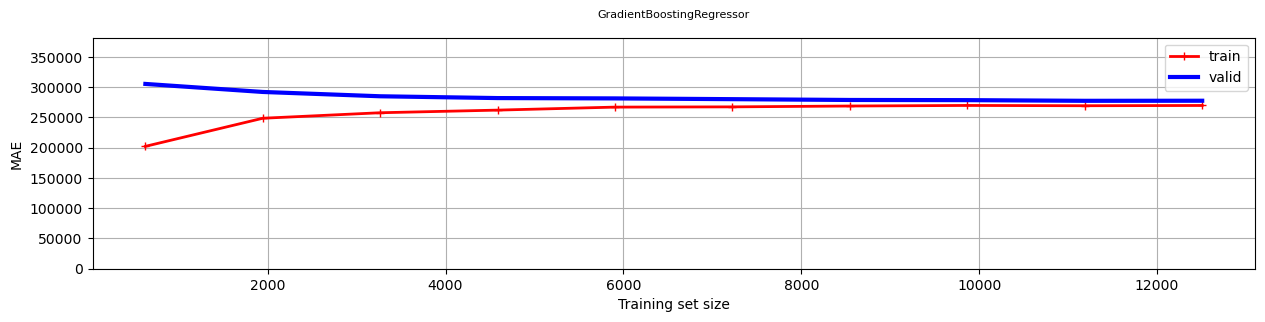

In [71]:
# insert your code here
_make_learning_curve(my_model,X_train,y_train)

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```Python
print('You will need to call the `_make_learning_curve(...)` function with my_model.')
print('That function takes the `X_train` and `y_train` as inputs')
```

</details>

## Q4: Write an explanation for your model's learning curve:

1. According to the learning curve, is the model `overfitted` or `underfitted` or has a `generalized fit`? Explain as your decision.

Your answer: 
- `[type your answer]`
This curve is generalized but it's still underfitting due to high MAE

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```
The fit is generalized, but its also still slightly underfitting the dataset. We might want to improve the performance with more model improvement steps. More features, feature representations or an even more complex model.
```

</details>

## Q5: Write an explanation for your model's errors:

Answer the following:

From Lab_07_Tutorial and above, find and fill-in the following information for the `Test Set`:

1. `Polynomial Degree-2` model's `MAE Score` was: 323,713.60
2. `Polynomial Degree-2` model's `R2 Score` was: 0.43
3. `My_Model` model's `MAE Score` was: 289,557
4. `My_Model` model's `R2 Score` was: 0.56

<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```
Check your solutions above and Lab07_Tutorial for specific answers.
The Polynomial Degree-2 model's:
- MAE Score is ~ 323,713.60.
- R2 Score is ~ 0.43.
The My_Model model's:
- MAE Score is ~ 289,557.52.
- R2 Score is ~ 0.56.
```

</details>

## Q6: Write an explanation for your model's errors on the `test set`:

Compared to that model, answer these questions about the new model:

1. Is the `MAE error` and the `R2 score` better or worse?
2. What is the MAE score difference in dollars?
3. What is the R2 score difference?

*Recall that R2 refers to the proportional amount of the Prices that can be explained by the model (e.g. as a %).*

Your answers: 
- MAE is less and R2 is greater so it's better
- MAE differences is 34,156.6
- R2 is greater that 0.13


<details><summary><span style="color:red">&#x1F6C8; Help</span> (Use this only as a last resort!!)</summary>

```
The new model's MAE in AUD-$ dollars is less than the Poly model, which is better!
The new model's R2 is greater than the Poly model, which is better! It explains more of the variation in price predictions.
```

</details>

## Q7: Export your model to a file:

1. Run the following cell, to export the model you have trained.

In [72]:
import sys
import pickle
model = my_model
model_name = f'x_Exported_Model_housing-model_{model.__class__.__name__}'
ofn1 = f'{model_name}.pkl'
with open(ofn1, 'wb') as file:
    pickle.dump(model, file)
    print(f'Exported to file:\t {ofn1}')
model_bytes = pickle.dumps(model)
model_str = model_bytes.decode('latin1')
ofn2 = f'{model_name}.txt'
with open(ofn2, 'w') as file:
    file.write( '\n'.join( [
        f'The {model.__class__.__name__} Model is {len(model_str):,} chars in total, at (approx.) memory size: {sys.getsizeof(model_bytes)/1024:,.2f} KiB\n\n', 
    ]))
    print(f'Exported to file:\t {ofn2}')


Exported to file:	 x_Exported_Model_housing-model_GradientBoostingRegressor.pkl
Exported to file:	 x_Exported_Model_housing-model_GradientBoostingRegressor.txt


## Q8: Run the Streamlit Dashboard from a new Anaconda Terminal. Make a Prediction.

1. Open a new Anaconda terminal.
2. Browse to your `Lab Package directory` (as usual).
3. You should find your two (2) newly exported files containing your model (.pkl).
4. Type `cd dash` to enter into the Dashboard directory.
5. If you have not already installed `!pip install streamlit` (top of this file), then do so now.
6. In your terminal, type: `streamlit run app.py` this should run the web-based dashboard with your model.
    * The command should open your default web browser.
    * It should open the page at the URL for your dashboard on your localhost, e.g. http://localhost:8501
    * If not, check the output messages for errors.
    * *NB: Ctrl+C on the terminal will close the dashboard web service.*
7. Make a `new prediction` at the bottom of the dashboard page.
8. Open the `dash/predictions_data.csv` file in Excel to confirm your prediction and input was stored.

To conclude Q8, please show your TA:
* `your input values` 10
* `your model's predicted value`
* Tell them `how much MAE error` and `R2 error` is `attached to that prediction` (Q5).


<p style="text-align:center;">That's it! Congratulations! <br> 
    Now, call an LA to check your solution. Then, upload your code on MyCourses.</p>

```














```
## **OPTIONAL EXTRA** - Partial Dependency Plots:
### Intepreting Features on Price for our new model:

- Like the `Residual Error Plots per Feature` we saw in the Tutorial, `Partial Dependency Plots` allow us see the average (independent) feature effect on `Y` in relative terms (i.e. relative house price change).

Key points:

> - PDP are to show an average of the marginal effects of a feature and  express the behaviour of the trained predictive model. [Hastie, 2009]
> - The **primary assumption** for interpreting PDPs is that the features are independent (i.e. not influencing one-another).
> - Note, this information of feature effects **cannot** be interpreted as effects in the underlying data or in the true population's behaviour. This is model interpretation, having parsed the dataset. That is different from Data Analysis, because the model has error: `f(x,p) = Y + error + noise`. Findings can be drawn from data analysis, specifically correlations (on the data sample).
> 
> Reference: [H2009] T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009.

- Run the code below.

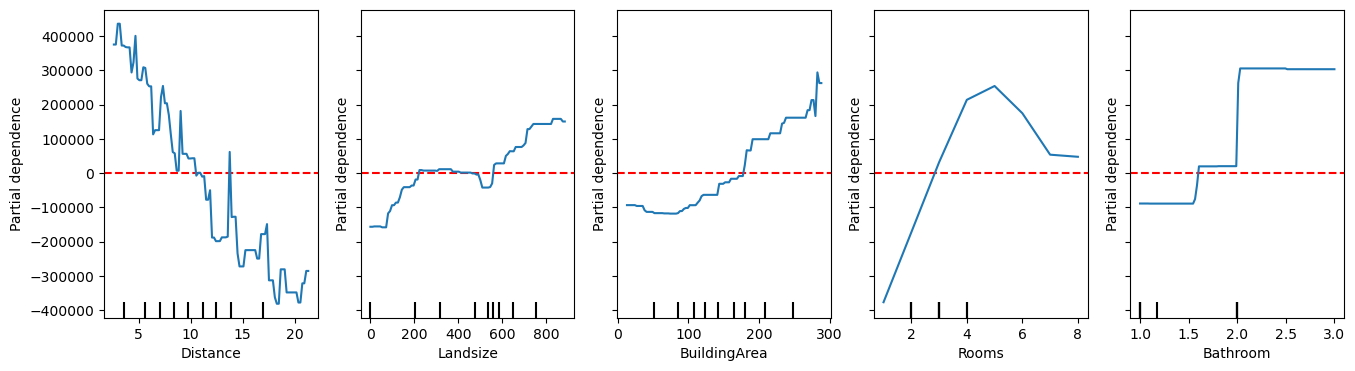

In [73]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=5, sharey=True, figsize=(16,4))
_ = [a.axhline(y=0, color='r', linestyle='dashed') for a in ax]
PartialDependenceDisplay.from_estimator(my_model, 
                                   features=[0,1,2,3,4], 
                                   X=X_test, 
                                   feature_names=cols_to_use, 
                                   #grid_resolution=10
                                   ax=ax
                                       )

### Analysis of plots:
- The blue line reports the effect of each variable's value on `Y`, which is the property/house `Price`.
- The red dashed-line shows the intercept (crossing-point) at which the variable has no effect on the predicted `Y` value.
- Falling and Rising trends:
    - Falling, suggests a negative correlation with `Y`.
    - Rising, suggests a positive correlation with `Y`.
    - We can test this by normalizing the two variables and applying Pearson's Correlation Co-efficient (R) test. A rough version of that is below. The partial dependency are therefore consistent with the notion of statistical correlation.
    - Here:
        - We are analysing the `prediction model's representation of the true population`, as learnt from the dataset.
        - We are not analysing the data sample of the true population (as we might do in Statistical Data Analysis).

In [74]:
from scipy.stats import pearsonr
def pearsons_r(a,b, alpha=0.05):
    corr_coef, p_value = pearsonr(a,b)
    print(f"Pearson correlation coefficient: {corr_coef}")
    print(f"P-value: {p_value}")
    print('Significantly' if p_value<alpha else 'Not significantly', 'Falling' if corr_coef<0 else 'Rising' if corr_coef>0 else 'Equal')
dft = df.copy().dropna()

In [75]:
pearsons_r( dft['Distance'] , dft['Price'] )

Pearson correlation coefficient: -0.14886684630931885
P-value: 4.8711536103904685e-32
Significantly Falling


In [76]:
pearsons_r( dft['BuildingArea'] , dft['Price'] )

Pearson correlation coefficient: 0.5305737802302436
P-value: 0.0
Significantly Rising
